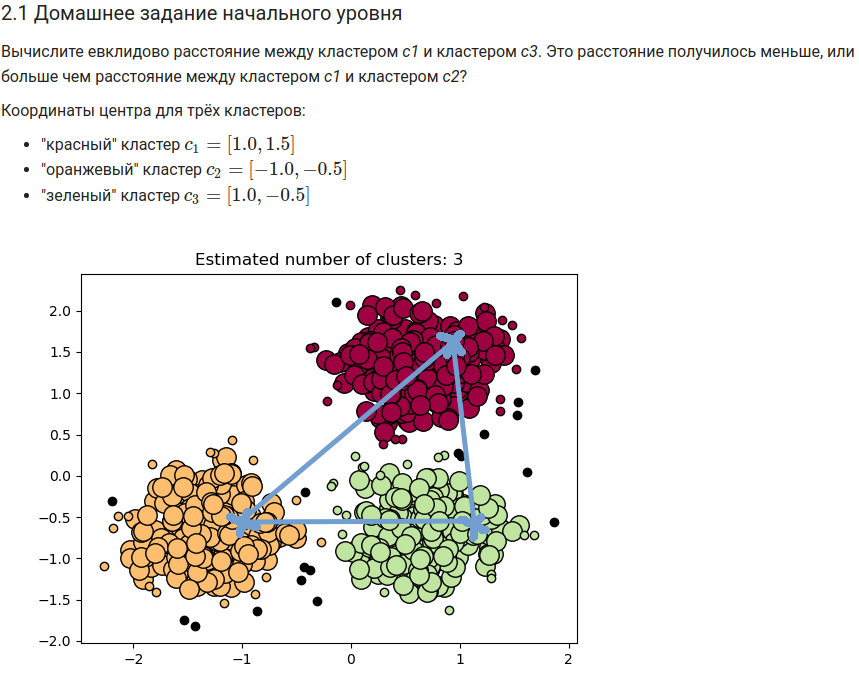## Module for work with the task of classterisation
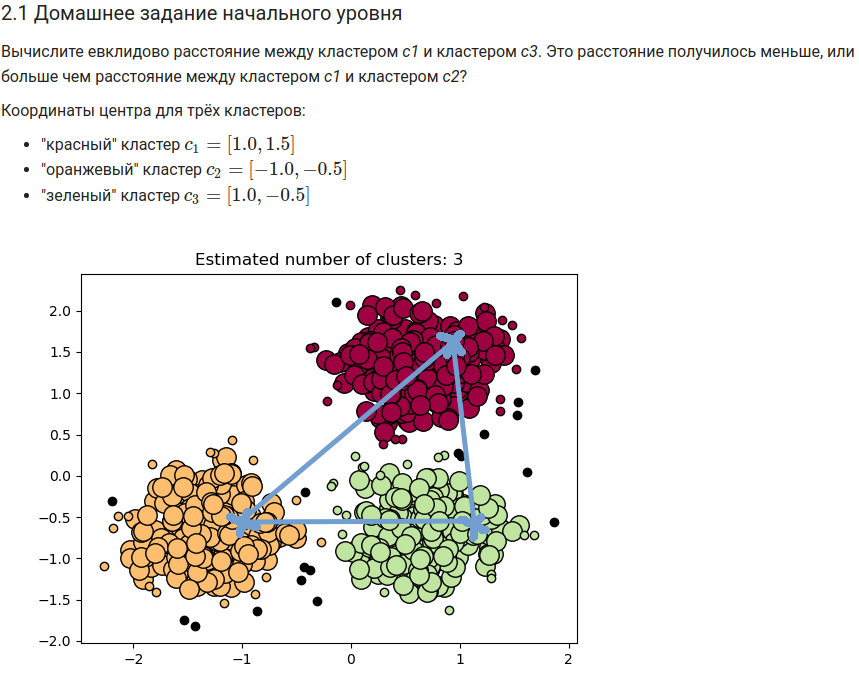

In [6]:
import numpy as np

def euclidean(iter1, iter2):
    return np.sqrt(sum([(iter1[index] - iter2[index])**2 for index in range(len(iter1))]))

In [16]:
# init three clusters
c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0, -.5]

dist_c1_c2 = euclidean(c1, c2)
dist_c1_c3 = euclidean(c1, c3)
print("Distance are between clusters c1 and c2: %.4f" % dist_c1_c2)
print("Distance are between clusters c1 and c3: %.4f" % dist_c1_c3)

Distance are between clusters c1 and c2: 2.8284
Distance are between clusters c1 and c3: 2.0000


In [19]:
dist_c1_c3 < dist_c1_c2
print('the distance between are clusters 1 and 3 less than clusters 1 and 2')

the distance between are clusters 1 and 3 less than clusters 1 and 2


In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [27]:
with open('clustering.pkl', 'rb') as file:
    data_clustering = pickle.load(file)
    
x = data_clustering['X']
y = data_clustering['Y']

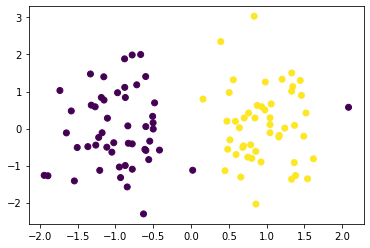

In [32]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y)

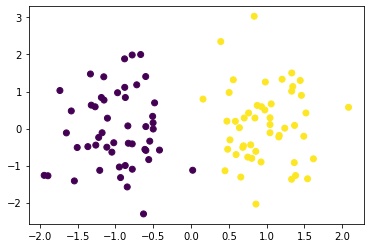

In [37]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2).fit(x)

plt.scatter(x[:, 0], x[:, 1], c=kmeans_model.labels_)

### homework 
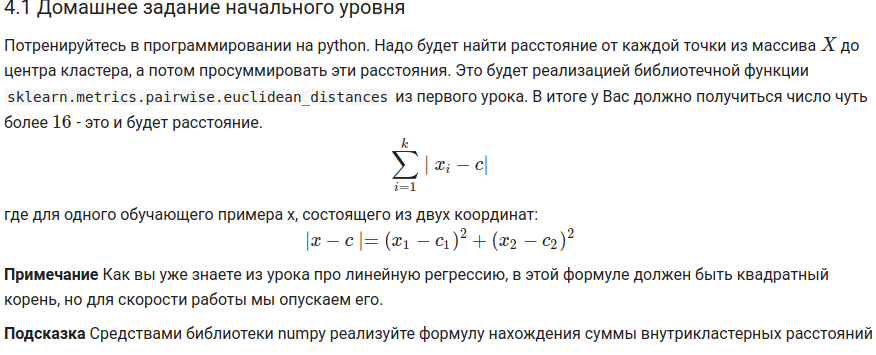

In [38]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [76]:
from sklearn.metrics import euclidean_distances
euclidean_distances(clust, [centroid])

array([[0.67627218],
       [0.7903905 ],
       [1.54472119],
       [0.35460782],
       [2.30214499],
       [1.24059857],
       [1.49491969],
       [1.4828237 ],
       [0.43207451],
       [1.12202928]])

In [77]:
def euclidean_distances(X, Y):
    def euclidean(iter1, iter2):
        return np.sqrt(sum([(iter1[index] - iter2[index])**2 for index in range(len(iter1))]))
    return np.sqrt([euclidean(x, Y)**2 for x in X])

In [78]:
euclidean_distances(clust, centroid)

array([0.67627218, 0.7903905 , 1.54472119, 0.35460782, 2.30214499,
       1.24059857, 1.49491969, 1.4828237 , 0.43207451, 1.12202928])

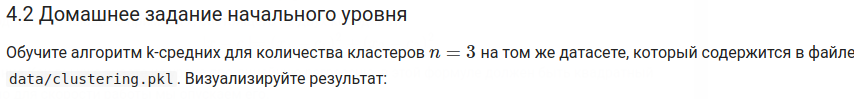 

In [91]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [92]:
import pickle

with open('clustering.pkl', 'br') as file:
    clusters = pickle.load(file)

In [95]:
x = clusters['X']
y = clusters['Y']

In [96]:
kmeans_model = KMeans(n_clusters=3).fit(x)

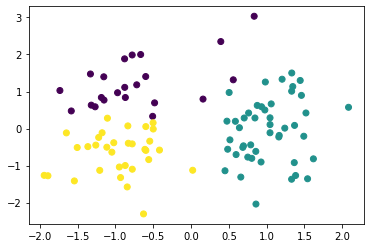

In [100]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans_model.labels_)

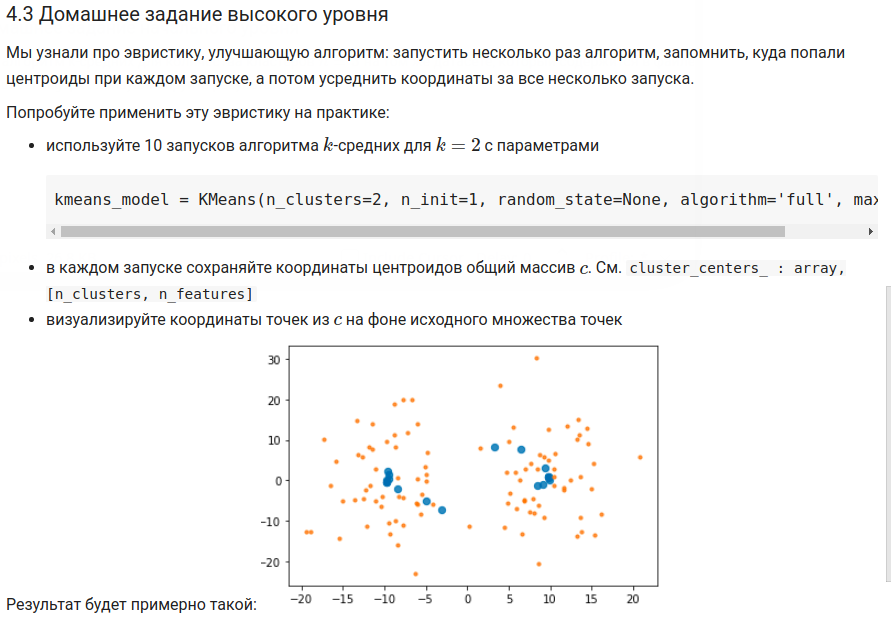

In [152]:
c = []

for i in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2).fit(x)
    [c.append(list(centroid)) for centroid in kmeans_model.cluster_centers_]
    
c = np.array(c)

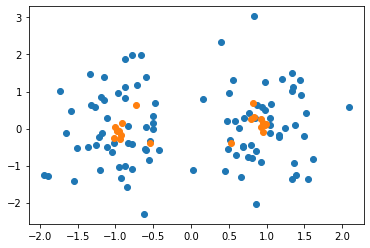

In [153]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(c[:, 0], c[:, 1])

## homework lesson 8. Learn model DBSCAN
Обучите модель DBSCAN с параметром min_samples=8. Визуализируйте результат.

In [82]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
with open('clustering.pkl', 'br') as file:
    clusters = pickle.load(file)

In [42]:
X = clusters['X']
y = clusters['Y']

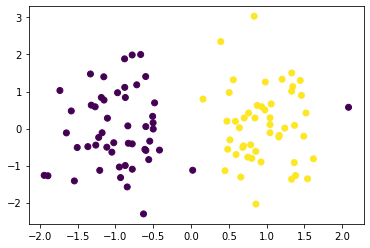

In [43]:
# actual indicators
plt.scatter(X[:, 0], X[:, 1], c=y)

In [78]:
# learn model DBSCAN and k-means
db_model = DBSCAN(eps=0.57).fit(X)
kmeans_model = KMeans(3).fit(X)

Score for clustering with the help of DBSCAN: 0.4039
AMI for clustering with the help of DBSCAN: 0.7318


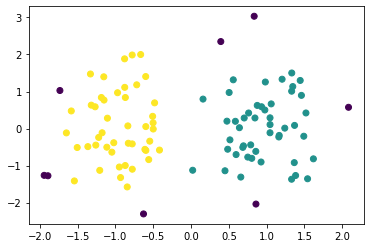

In [84]:
plt.scatter(X[:, 0], X[:, 1],
            c=db_model.labels_)

print('Score for clustering with the help of DBSCAN: %.4f' % silhouette_score(X, db_model.labels_))
print('AMI for clustering with the help of DBSCAN: %.4f' % adjusted_mutual_info_score(y , db_model.labels_))

Score for clustering with the help of k-means: 0.4524
AMI for clustering with the help of k-means: 0.6139


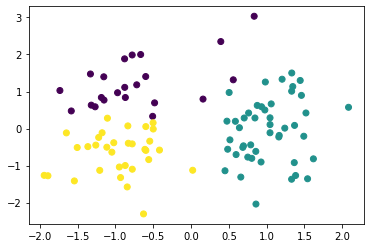

In [85]:
plt.scatter(X[:, 0], X[:, 1],
            c=kmeans_model.labels_)

print('Score for clustering with the help of k-means: %.4f' % silhouette_score(X, kmeans_model.labels_))
print('AMI for clustering with the help of k-means: %.4f' % adjusted_mutual_info_score(y, kmeans_model.labels_))

## homework 10

In [147]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score

from sklearn.model_selection import train_test_split, GridSearchCV

In [148]:
with open('clustering.pkl', 'br') as file:
    clusters = pickle.load(file)

In [149]:
X = clusters['X']
y = clusters['Y']

In [176]:
clusters = []
for n_clusters in range(2, 5):
    model = KMeans(n_clusters=n_clusters, random_state=17).fit(X)
    silhouetter = silhouette_score(X, model.labels_)
    ami = adjusted_mutual_info_score(y, model.labels_)
    print('k=%s Score silhouetter for kmeans %.3f' % (n_clusters, silhouetter))
    print('k=%s Score AMI for kmeans %.3f' % (n_clusters, ami))
    print('\n')
    clusters.append({'n_clusters': n_clusters, 'silhouetter': silhouetter, 'ami': ami})
    best_model = max(clusters, key=lambda x: x['ami'])
    print('The best model with k=%s \nAMI=%.3f' % (best_model['n_clusters'], best_model['ami']))
    

k=2 Score silhouetter for kmeans 0.447
k=2 Score AMI for kmeans 0.929


The best model with k=2 
AMI=0.929
k=3 Score silhouetter for kmeans 0.452
k=3 Score AMI for kmeans 0.614


The best model with k=2 
AMI=0.929
k=4 Score silhouetter for kmeans 0.442
k=4 Score AMI for kmeans 0.583


The best model with k=2 
AMI=0.929


In [139]:
best_kmeans = grid_kmeans.best_estimator_.fit(X)

In [140]:
best_kmeans

KMeans(n_clusters=2)

Score silhouetter for kmeans 0.447


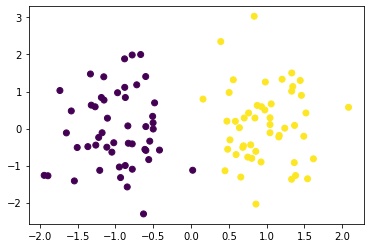

In [141]:
plt.scatter(X[:, 0], X[:, 1], c=best_kmeans.labels_)
print('Score silhouetter for kmeans %.3f' % silhouette_score(X, best_kmeans.labels_))

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

clusters = pd.read_csv('7_10_clustering_hw.csv')
X = clusters.iloc[:, [0,1]]
y = clusters.loc[:, 'y']

In [195]:
X

,x1,x2
0,6.221343,4.968753
1,7.360892,8.857455
2,-0.108178,4.730723
3,3.127358,1.927986
4,-0.817259,6.759974
...,...,...
295,0.863590,4.798039
296,4.451104,2.183275
297,7.530399,8.261081
298,0.103995,5.893627


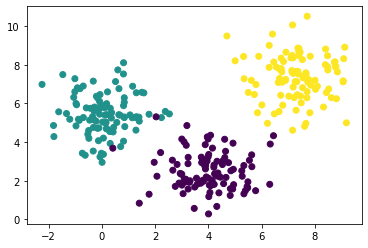

In [199]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)

### 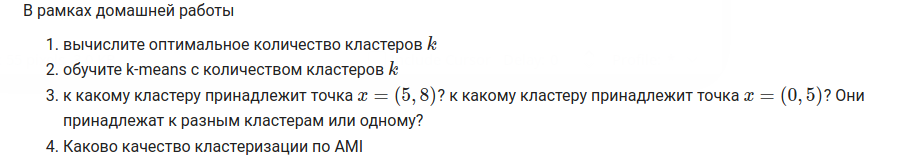

In [226]:
# calculate optinum with the elbow rule

from sklearn.cluster import KMeans

wcss = []
MAX_CLUSTERS = range(1, 7)
for cluster_num in MAX_CLUSTERS:
    model = KMeans(cluster_num, random_state=17).fit(X)
    wcss.append(model.inertia_)
    print("cluster_num %s, metric %s" % (cluster_num, model.inertia_))

cluster_num 1, metric 4454.980609857942
cluster_num 2, metric 1795.9465768939904
cluster_num 3, metric 609.7301659376425
cluster_num 4, metric 520.632974522077
cluster_num 5, metric 446.4147763404116
cluster_num 6, metric 390.43552371319277


best cluster num: 3


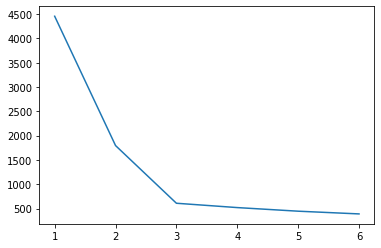

In [227]:
D = []
for i in range(0, len(wcss)-1):
    d = abs(wcss[i+1]-wcss[i])/abs(wcss[i]-wcss[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot(MAX_CLUSTERS, wcss)

silhouette=0.651
AMI=0.970


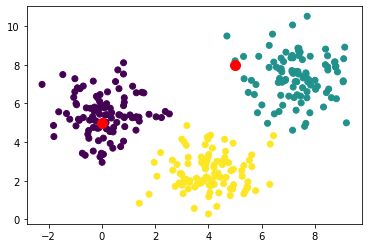

In [240]:
model = KMeans(n_clusters=3, random_state=17).fit(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_)
print('silhouette=%.3f' % silhouette_score(X, model.labels_))
print('AMI=%.3f' % adjusted_mutual_info_score(y, model.labels_))
plt.scatter([5, 0], [8, 5], s=100, color='r')

In [236]:
# task 3
model.predict([[5, 8], [0, 5]])
# (5,8) - first cluster, (0, 5)- second cluster and they are different

/home/stynic/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int32)